# Single and Multiagent chatbot using Langgraph and Groq 

Langgraph = LangGraph is a Python library built on top of LangChain for creating stateful, graph-based AI workflows. In it, nodes represent logic (e.g., LLM calls or functions) and edges define transitions, enabling developers to design and manage complex AI agents.

Groq = Groq is a company that builds ultra-fast AI hardware and APIs, using its Tensor Streaming Processor (TSP) to run large language models with low latency and high efficiency, often faster than GPUs.

API = An API (Application Programming Interface) is a set of rules that lets different software applications communicate with each other.

It allows one program to request data or services from another.

Example: Your weather app uses an API to get data from a weather service.

Simple definition:
API = A bridge that lets software programs talk to each other.

API Key= An API key is a unique code (like a password) used to authenticate and authorize access to an API.

> It tells the API who you are (the client/app making the request).

> It helps the provider track usage (limits, billing, analytics).

> It prevents unauthorized access.

1. State Definition

What it is: Memory of the chatbot that stores conversation context, user info, session variables, and temporary flags.

What it does:

Tracks previous messages to maintain context in multi-turn conversations.

Remembers user preferences, selections, or inputs.

Helps the bot respond intelligently instead of starting from scratch each time.

In multi-agent setups, can be local to an agent or shared globally across agents.

2. Workflow Nodes

What it is: Individual steps in the chatbot graph where each node performs a specific task.

What it does:

Handles user input processing, logic/decision-making, API calls, or LLM calls (via ChatGroq).

Outputs results or determines the next node based on conditions.

Modular design allows easy addition, removal, or reuse of nodes.

Examples: Input node, Decision node, LLM node, API node, Output node.

3. StateGraph Construction

What it is: The structure connecting all nodes in a graph, defining the conversation flow.

What it does:

Connects nodes via edges representing possible transitions.

Handles conditional branching based on user input or chatbot logic.

Ensures the chatbot can follow multiple paths in a conversation.

Supports single-agent (linear flow) or multi-agent (parallel/coordinated flows) setups.

4. Visualisation

What it is: Graphical representation of nodes and edges in the chatbot workflow.

What it does:

Helps developers understand, debug, and optimize conversation flow.

Provides a clear view of how nodes interact and how the chatbot moves between them.

Useful for multi-agent workflows to track coordination between agents.

5. Message Processing

What it is: The mechanism for handling user messages within the chatbot workflow.

What it does:

Routes input to the correct node or agent.

Applies preprocessing (e.g., cleaning text, intent detection).

Calls LLM nodes (via ChatGroq) or decision nodes to generate responses.

Updates the state after each interaction to maintain context.

6. Result / Output

What it is: The final response delivered to the user after processing.

What it does:

Combines outputs from LLMs, API calls, or decision logic.

Can be simple text, structured data, or multi-agent aggregated responses.

Ensures context-aware, coherent, and relevant replies.

7. Key Advantages

Stateful memory ensures coherent multi-turn conversations.

Graph-based design allows modular, flexible workflows.

Supports both simple and complex multi-agent interactions.

Fast LLM inference with ChatGroq.

8. Technologies Used

LangGraph: Graph-based workflow creation.

ChatGroq / LLMs: Fast AI response generation.

Python: Implementation language.

Optional: APIs, databases, and visualization libraries for extended functionality.

# pip install requirements

In [5]:
#pip install langgraph langsmith.
#pip install langchain langchain_groq langchain_community.

Importing libraries

In [6]:
from langchain_groq import ChatGroq
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from IPython.display import Image, display

Summary of what snippet does:
>Connects to the Groq LLM service using your API key.

>Loads a specific LLM model for chatting (Gemma2-9b-It).

>Sets up a LangSmith key for managing workflow and conversation state.

In [ ]:
groq_api_key = 'gsk................kg'  #use  your own api key
llm = ChatGroq(groq_api_key=groq_api_key, model_name="Gemma2-9b-It")
langsmith='lsv..................dc'

The llm object represents your chatbot AI model instance.

It connects to the Groq LLM service using your API key and the specified model (Gemma2-9b-It).

You can call methods on llm to send user messages and receive AI-generated responses, making it the core interface for your chatbot.

 In short: llm is your chatbot “brain” in the code.

In [8]:
llm=ChatGroq(groq_api_key=groq_api_key, model_name="Gemma2-9b-It")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x000001D6120CC3B0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x000001D6120F81D0>, model_name='Gemma2-9b-It', model_kwargs={}, groq_api_key=SecretStr('**********'))

State defines a typed dictionary specifying the structure of the chatbot’s state.

The messages key holds a list of chat messages, with Annotated[list, add_messages] ensuring new messages are appended rather than replacing existing ones.

graph_builder = StateGraph(State) initializes a stateful workflow graph using this state schema.

This configuration enables the chatbot to maintain conversation history and manage state across interactions efficiently.

In [9]:
class State(TypedDict):
  # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
  messages:Annotated[list,add_messages]

graph_builder=StateGraph(State)

graph_builder is the chatbot’s workflow manager.

It keeps track of the conversation state (like the list of messages).

It helps the chatbot run through its steps while remembering past messages.

Think of it as the engine that controls the chatbot and keeps context.

In [10]:
graph_builder


In [ ]:
def chatbot(state:State):
  return {"messages":llm.invoke(state['messages'])}  #This function sends the current conversation messages to the AI model and returns the chatbot’s reply to update the conversation.

In [12]:
graph_builder.add_node("chatbot",chatbot)  #It adds a node named "chatbot" to the workflow, linking it to the chatbot logic so it runs during the conversation.

In [13]:
graph_builder

In [14]:
graph_builder.add_edge(START,"chatbot") #These lines set the chatbot’s flow to start, generate a response, and then end.
graph_builder.add_edge("chatbot",END)  #They define the sequence of steps in the conversation workflow.

In [ ]:
graph=graph_builder.compile() 
#This line compiles the workflow graph:
#graph = graph_builder.compile() takes all the nodes and edges we defined.
#It creates a ready-to-run chatbot workflow that can process messages and maintain state.

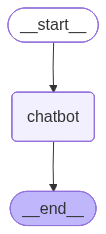

In [16]:
try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass 

#graph.get_graph().draw_mermaid_png() generates a graph image (Mermaid format) showing nodes and edges.
#display(Image(...)) shows the image in the notebook.
#The try-except ensures that if there’s an error (e.g., rendering fails), the program continues without crashing.

In [17]:
while True:
  user_input=input("User: ")
  if user_input.lower() in ["quit","q"]:
    print("Good Bye")
    break
  for event in graph.stream({'messages':("user",user_input)}):
    print(event.values())
    for value in event.values():
      print(value['messages'])
      print("Assistant:",value["messages"].content)
      
#Here’s what this code does, step by step:
#Infinite loop (while True) lets the chatbot keep running until the user decides to quit.
#user_input = input("User: ") → takes a message from the user.
#If the input is "quit" or "q", the loop breaks and prints "Good Bye".
#graph.stream({'messages':("user",user_input)}) → sends the user input into the stateful workflow graph.
#The for event in graph.stream(...) loop streams responses from the graph as they are generated.
#event.values() contains the updated state from the chatbot.
#print(value['messages']) prints the raw message object, and
#print("Assistant:", value["messages"].content) prints the AI-generated response in a readable format.
#In short: This code lets the user chat with the AI in real-time, maintaining conversation history and displaying responses.

dict_values([{'messages': AIMessage(content="Generative AI has a tremendously broad scope, impacting numerous industries and aspects of our lives. Here's a breakdown:\n\n**Creative Industries:**\n\n* **Art & Design:** Generating paintings, sculptures, logos, website designs, and other visual content.\n* **Music & Audio:** Composing original music, creating sound effects, generating voiceovers, and even mimicking specific artists' styles.\n* **Writing & Storytelling:**  Crafting stories, poems, articles, marketing copy, dialogue for movies and games, and even generating code.\n\n**Technology & Development:**\n\n* **Code Generation:** Automating code writing in various programming languages, speeding up development processes.\n* **Data Augmentation:** Creating synthetic data to train machine learning models, addressing data scarcity issues.\n* **Software Development:** Assisting in building and testing software, automating repetitive tasks.\n\n**Business & Marketing:**\n\n* **Personalize

# Now, we will proceed to implement the multi-agent chatbot, leveraging the previously imported libraries and setup.

In [ ]:
class State(TypedDict):
    messages: Annotated[list, add_messages]
    sentiment: str

# 1. Preprocessing Node
def preprocess(state: State) -> State:
    cleaned = state["messages"][-1].content.strip()
    state["messages"][-1].content = cleaned
    return state

# 2. Sentiment Analysis Node
def analyze_sentiment(state: State) -> State:
    msg = state["messages"][-1].content
    state["sentiment"] = "positive" if "good" in msg else "neutral"
    return state

# 3. Chatbot Node
def chatbot(state: State) -> State:
    return {"messages": llm.invoke(state['messages'])}

# 4. Logging Node
def logger(state: State) -> State:
    print(f"LOG: {state['messages'][-1].content}, Sentiment: {state.get('sentiment')}")
    return state

#The code defines a multi-agent chatbot workflow using a shared State to maintain conversation context. The State stores all messages and the latest sentiment. Each function acts as a workflow node:
#Preprocessing – cleans the latest message by removing extra spaces.
#Sentiment Analysis – evaluates the message and assigns a simple sentiment label (positive or neutral).
#Chatbot – sends messages to the LLM (llm) to generate AI responses, updating the state.
#Logging – prints the latest message and its sentiment for monitoring or debugging.
#In short: this workflow enables a chatbot to process user messages, analyze sentiment, generate responses, and maintain conversation history, all in a modular, stateful manner.

In [19]:
# Build the graph
builder = StateGraph(State)
builder.add_node("preprocess", preprocess)
builder.add_node("analyze_sentiment", analyze_sentiment)  # renamed
builder.add_node("chatbot", chatbot)
builder.add_node("logger", logger)

#This code creates the multi-agent chatbot workflow:
#builder = StateGraph(State)
#Sets up a stateful workflow using the State structure.
#builder.add_node("preprocess", preprocess)
#Adds the preprocessing step to clean user messages.
#builder.add_node("analyze_sentiment", analyze_sentiment)
#Adds the sentiment analysis step to check the message mood.
#builder.add_node("chatbot", chatbot)
#Adds the chatbot step to generate AI responses.
#builder.add_node("logger", logger)
#Adds the logging step to print messages and sentiment for tracking.
#In short: this code sets up all the steps (nodes) of the chatbot workflow so it can run in order and keep conversation history.

In [20]:
# Define flow
builder.add_edge(START, "preprocess")
builder.add_edge("preprocess", "analyze_sentiment")  # renamed
builder.add_edge("analyze_sentiment", "chatbot")     # renamed
builder.add_edge("chatbot", "logger")
builder.add_edge("logger", END)

#This sets the sequence of all chatbot steps so messages flow through preprocessing → sentiment analysis → AI response → logging → end.

In [ ]:
graph = builder.compile()
#This line compiles the workflow graph:
#graph = graph_builder.compile() takes all the nodes and edges we defined.
#It creates a ready-to-run chatbot workflow that can process messages and maintain state.

In [ ]:
# Draw the graph
try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass
#it visually represents the workflow of the multi-agent chatbot safely.

In [26]:
# Invoke the graph
input_message = "hello kuldeep here."
final_state = graph.invoke({"messages": ("user", input_message)})

# Print the final state
print("Final State:", final_state)
print("Chatbot's response:", final_state['messages'][-1].content)
print("Detected Sentiment:", final_state['sentiment'])

input_message_2 = "weather is so hot today"
final_state_2 = graph.invoke({"messages": ("user", input_message_2)})
print("Final State 2:", final_state_2)
print("Chatbot's response 2:", final_state_2['messages'][-1].content)
print("Detected Sentiment 2:", final_state_2['sentiment'])


'''This section runs the chatbot workflow with user messages and prints the results:
input_message = "hello kuldeep here."
Sets the first user message.
final_state = graph.invoke({"messages": ("user", input_message)})
Sends the message through the multi-agent workflow graph.
Each node (preprocess, sentiment analysis, chatbot, logger) runs in order.
print("Final State:", final_state)
Shows the updated state after the workflow, including messages and sentiment.
print("Chatbot's response:", final_state['messages'][-1].content)
Prints the AI-generated reply to the user message.
print("Detected Sentiment:", final_state['sentiment'])
Shows the sentiment detected for the message.
Repeats the process for a second message (input_message_2) to show stateful conversation handling.

In short: this code invokes the multi-agent chatbot, generates AI responses, detects sentiment, and prints the results for each user message.'''

LOG: Hello Kuldeep! 👋

It's nice to meet you. What can I do for you today? 😊
, Sentiment: neutral
Final State: {'messages': [HumanMessage(content='hello kuldeep here.', additional_kwargs={}, response_metadata={}, id='11617d04-ad56-424a-8450-a34e442b323d'), AIMessage(content="Hello Kuldeep! 👋\n\nIt's nice to meet you. What can I do for you today? 😊\n", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 26, 'prompt_tokens': 14, 'total_tokens': 40, 'completion_time': 0.047272727, 'prompt_time': 0.001501609, 'queue_time': 0.270479631, 'total_time': 0.048774336}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--25483205-249f-4566-84de-804bb9f174c7-0', usage_metadata={'input_tokens': 14, 'output_tokens': 26, 'total_tokens': 40})], 'sentiment': 'neutral'}
Chatbot's response: Hello Kuldeep! 👋

It's nice to meet you. What can I do for you today? 😊

Detected Sentiment:

'This section runs the chatbot workflow with user messages and prints the results:\n\ninput_message = "hello kuldeep here."\n\nSets the first user message.\n\nfinal_state = graph.invoke({"messages": ("user", input_message)})\n\nSends the message through the multi-agent workflow graph.\n\nEach node (preprocess, sentiment analysis, chatbot, logger) runs in order.\n\nprint("Final State:", final_state)\n\nShows the updated state after the workflow, including messages and sentiment.\n\nprint("Chatbot\'s response:", final_state[\'messages\'][-1].content)\n\nPrints the AI-generated reply to the user message.\n\nprint("Detected Sentiment:", final_state[\'sentiment\'])\n\nShows the sentiment detected for the message.\n\nRepeats the process for a second message (input_message_2) to show stateful conversation handling.\n\nIn short: this code invokes the multi-agent chatbot, generates AI responses, detects sentiment, and prints the results for each user message.'

# Implemented single-agent and multi-agent stateful chatbots with LangGraph and Groq, supporting message preprocessing, AI responses, sentiment analysis, logging, and conversation state management.